In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import torch

## loading the data :

In [2]:
df = pd.read_csv('kerala_tourism_data.csv')
df

,Year,Month,Time format,No. of flights,No. of hotels booked,Tourism_in_Kerala,kerala_tourism_package,Tourist_places,Travel,Food_Drink,Flights_Kerala,Trains_Kerala,Rain,T_Max,T_Min,Tourists
0,2010,Jan,01-2010,2990.0,514000.0,87,67,10,51,78,0,35,6.8313,29.3500,15.4200,8.183560e+05
1,2010,Feb,02-2010,2810.0,457000.0,83,78,18,44,72,0,35,20.1979,31.7900,16.1100,7.212010e+05
2,2010,Mar,03-2010,3140.0,417000.0,93,50,9,47,66,0,90,66.8573,33.3100,18.4200,7.199440e+05
3,2010,Apr,04-2010,2670.0,434000.0,95,97,9,49,65,0,100,94.4786,33.7100,20.6200,7.354320e+05
4,2010,May,05-2010,2520.0,488000.0,90,69,0,54,64,0,56,112.6957,33.0600,19.1500,8.034310e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,2022,Aug,08-2022,4860.0,914000.0,19,39,69,81,61,7,12,969.5651,29.9072,18.8279,1.518583e+06
152,2022,Sep,09-2022,6160.0,846000.0,23,52,83,86,65,4,12,405.0702,30.1213,19.3321,1.602462e+06
153,2022,Oct,10-2022,6410.0,1140000.0,21,60,79,83,58,9,13,332.0119,29.6674,18.3958,1.775547e+06
154,2022,Nov,11-2022,6650.0,1260000.0,22,32,75,84,58,4,13,190.9530,28.8275,16.7351,1.724940e+06


# EDA

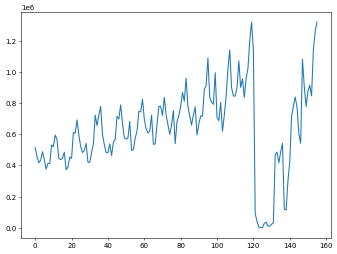

In [6]:
plt.figure(figsize=(8,6), dpi=50)
plt.plot(range(0,156),df['No. of hotels booked'])

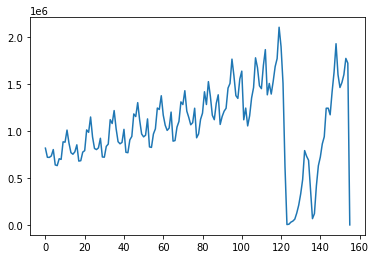

In [11]:
plt.plot(range(0,156), df['Tourists'])

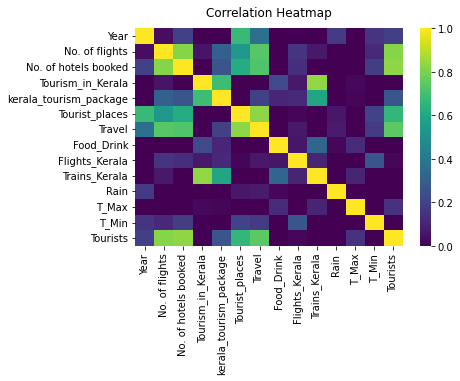

In [3]:
heatmap = sn.heatmap(df.corr(), vmin=0,vmax=1, annot=False, cmap='viridis')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

In [4]:
# removing the outliers
for i in range(120,144):
    df=df.drop(index=i, axis=0)

In [5]:
df.iloc[115:135]

,Year,Month,Time format,No. of flights,No. of hotels booked,Tourism_in_Kerala,kerala_tourism_package,Tourist_places,Travel,Food_Drink,Flights_Kerala,Trains_Kerala,Rain,T_Max,T_Min,Tourists
115,2019,Aug,08-2019,5910.0,836000.0,21,23,44,74,48,5,27,1269.6210,29.7826,18.9168,1.395385e+06
116,2019,Sep,09-2019,6080.0,959000.0,24,33,54,67,62,9,14,467.8957,29.5790,19.8750,1.531279e+06
117,2019,Oct,10-2019,6250.0,1020000.0,25,38,59,70,50,11,15,337.9965,29.7552,19.2936,1.688298e+06
118,2019,Nov,11-2019,6420.0,1200000.0,30,56,65,80,50,5,16,94.8329,29.5375,17.9780,1.773738e+06
119,2019,Dec,12-2019,6590.0,1320000.0,35,54,85,85,54,10,17,40.2491,28.8493,17.7629,2.107766e+06
144,2022,Jan,01-2022,3290.0,775000.0,17,39,34,51,64,4,6,3.9190,30.2061,16.8381,1.244814e+06
145,2022,Feb,02-2022,3360.0,604000.0,21,43,67,64,64,12,9,3.2593,31.3163,17.3475,1.174193e+06
146,2022,Mar,03-2022,6170.0,542000.0,22,45,81,71,64,5,10,49.0941,32.8271,17.6096,1.419354e+06
147,2022,Apr,04-2022,5950.0,1080000.0,22,53,88,81,65,7,12,168.1827,32.8408,19.5771,1.629023e+06
148,2022,May,05-2022,6420.0,904000.0,22,60,100,88,61,9,15,471.1308,32.1943,19.0016,1.932113e+06


# normalising

In [5]:
df['Tourists'].describe()

count    1.320000e+02
mean     1.146634e+06
std      3.367936e+05
min      2.944380e+01
25%      8.851100e+05
50%      1.122119e+06
75%      1.380878e+06
max      2.107766e+06
Name: Tourists, dtype: float64

In [38]:
for i in df.columns[3:]:
    df[i] = (df[i]-df[i].mean() )/df[i].std()

# splitting into training and testing dataset

## LSTM model :

# Temporal Fusion Transformer:

In [ ]:
# preparing dataset to feed into the model :
data = df.copy()
k=1
for i in range(0,156):
    data['Time format '][i] = k
    if(i<=119 or i>=144):
        k=k+1

In [17]:
data

,Year,Month,Time format,No. of flights,No. of hotels booked,Tourism_in_Kerala,kerala_tourism_package,Tourist_places,Travel,Food_Drink,Flights_Kerala,Trains_Kerala,Rain,T_Max,T_Min,Tourists
0,2010,Jan,1,-1.495712,-0.884701,2.026080,0.991795,-1.045371,-0.878318,1.123106,-0.698796,0.053987,-0.824289,-0.397869,-0.357263,-0.974717
1,2010,Feb,2,-1.664812,-1.162402,1.819401,1.717645,-0.702008,-1.414005,0.546258,-0.698796,0.053987,-0.771816,0.440633,-0.292316,-1.263187
2,2010,Mar,3,-1.354795,-1.357280,2.336098,-0.129973,-1.088291,-1.184425,-0.030590,-0.698796,3.522537,-0.588648,0.962980,-0.074887,-1.266919
3,2010,Apr,4,-1.796335,-1.274457,2.439438,2.971387,-1.088291,-1.031371,-0.126732,-0.698796,4.153183,-0.480216,1.100439,0.132189,-1.220933
4,2010,May,5,-1.937252,-1.011372,2.181089,1.123768,-1.474575,-0.648738,-0.222873,-0.698796,1.378343,-0.408702,0.877067,-0.006175,-1.019032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,2022,Aug,128,0.261052,1.064077,-1.487462,-0.855823,1.486930,1.417483,-0.511297,-0.278700,-1.396498,2.955068,-0.206388,-0.036493,1.104382
152,2022,Sep,129,1.482332,0.732785,-1.280783,0.002000,2.087816,1.800117,-0.126732,-0.458741,-1.396498,0.739058,-0.132813,0.010965,1.353433
153,2022,Oct,130,1.717194,2.165137,-1.384122,0.529891,1.916134,1.570537,-0.799721,-0.158673,-1.333433,0.452257,-0.288795,-0.077165,1.867353
154,2022,Nov,131,1.942661,2.749771,-1.332453,-1.317728,1.744453,1.647063,-0.799721,-0.458741,-1.333433,-0.101491,-0.577426,-0.233478,1.717092


In [40]:
data.columns

Index(['Year', 'Month', 'Time format ', 'No. of flights',
       'No. of hotels booked', 'Tourism_in_Kerala', 'kerala_tourism_package',
       'Tourist_places', 'Travel', 'Food_Drink', 'Flights_Kerala',
       'Trains_Kerala', 'Rain', 'T_Max', 'T_Min', 'Tourists'],
      dtype='object')

In [23]:
train = data.iloc[:120]
test = data.iloc[144:]   ## we will predict the values for the year 2021

In [26]:
max_prediction_length = 12   ## We will predict the entire 2021 year 
max_encoder_length = 120
training_cutoff = train['Time format '].max() - max_prediction_length  ## validation set of 12 values

In [39]:
import pytorch_forecasting

ImportError: cannot import name 'ClassNamePrefixFeaturesOutMixin' from 'sklearn.base' (c:\Users\aarya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py)

In [35]:
from pytorch_forecasting import TemporalFusionTransformer, TimeSeriesDataSet
from pytorch_forecasting.data import GroupNormalizer
from pytorch_forecasting.metrics import MAE, SMAPE, PoissonLoss, QuantileLoss
from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters

ImportError: cannot import name 'ClassNamePrefixFeaturesOutMixin' from 'sklearn.base' (c:\Users\aarya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py)